In [1]:
import pandas as pd

# Đọc và gộp dữ liệu cho từng loại
# Gộp NhaDat.csv và NhaDatT12.csv
nha_dat_files = [
    "/content/NhaDat.csv",
    "/content/NhaDatT122.csv"
]
nha_dat_combined = pd.concat([pd.read_csv(file) for file in nha_dat_files])
nha_dat_combined.to_csv("/content/NhaDat_combined.csv", index=False)
print("NhaDat đã được gộp vào NhaDat_combined.csv")

# Gộp ChungCu.csv và ChungCuT12.csv
chung_cu_files = [
    "/content/ChungCu.csv",
    "/content/ChungCuT122.csv"
]
chung_cu_combined = pd.concat([pd.read_csv(file) for file in chung_cu_files])
chung_cu_combined.to_csv("/content/ChungCu_combined.csv", index=False)
print("ChungCu đã được gộp vào ChungCu_combined.csv")

# Gộp DAT_NENT11.csv và DatNenT12.csv
dat_nen_files = [
    "/content/DAT_NENT11.csv",
    "/content/DatNenT122.csv"
]
dat_nen_combined = pd.concat([pd.read_csv(file) for file in dat_nen_files])
dat_nen_combined.to_csv("/content/DatNen_combined.csv", index=False)
print("DatNen đã được gộp vào DatNen_combined.csv")


NhaDat đã được gộp vào NhaDat_combined.csv
ChungCu đã được gộp vào ChungCu_combined.csv
DatNen đã được gộp vào DatNen_combined.csv


In [2]:
data_csv1 = "/content/NhaDat_combined.csv"
data_csv2 = "/content/ChungCu_combined.csv"
data_csv3 = "/content/DatNen_combined.csv"


# **Làm sạch dữ liệu**

In [3]:
import pandas as pd


def cleaning_data(data_path):
    # Đọc file CSV
    df_property = pd.read_csv(data_path)

    # Xem thông tin về dữ liệu
    print("Thông tin dữ liệu ban đầu:")
    print(df_property.info())

    # 1. Loại bỏ các giá trị thiếu hoặc không hợp lệ
    # Giả sử các giá trị hợp lệ ở các cột 'price_VND', 'area', 'type', 'du_an' là không rỗng và không chứa giá trị không hợp lệ
    # Loại bỏ các dòng có giá trị thiếu
    df_property_cleaned = df_property.dropna(subset=['price_VND', 'area', 'type'])

    # 2. Chuẩn hóa kiểu dữ liệu cho các cột price_VND và area
    # Chuyển các cột 'price_VND' và 'area' thành kiểu số (float)
    df_property_cleaned['price_VND'] = pd.to_numeric(df_property_cleaned['price_VND'], errors='coerce')
    df_property_cleaned['area'] = pd.to_numeric(df_property_cleaned['area'], errors='coerce')

    # Loại bỏ các dòng có giá trị 'price_VND' hoặc 'area' không hợp lệ (NaN sau khi chuyển đổi)
    df_property_cleaned = df_property_cleaned.dropna(subset=['price_VND', 'area'])

    # Loại bỏ các giá trị không hợp lệ (ví dụ giá trị âm hoặc không hợp lý)
    df_property_cleaned = df_property_cleaned[df_property_cleaned['price_VND'] > 0]  # Giả sử giá trị 'price_VND' phải lớn hơn 0
    df_property_cleaned = df_property_cleaned[df_property_cleaned['area'] > 0]  # Giả sử 'area' phải lớn hơn 0

    # 3. Chuẩn hóa định dạng các thuộc tính
    # Chuẩn hóa cột 'type' về chữ thường và 'du_an' về title case
    df_property_cleaned['type'] = df_property_cleaned['type'].str.lower()
    df_property_cleaned['du_an'] = df_property_cleaned['du_an'].str.strip().str.title()

    # 4. Loại bỏ dữ liệu trùng lặp
    df_property_cleaned = df_property_cleaned.drop_duplicates()

    return df_property_cleaned





In [4]:
df_property_cleaned = cleaning_data(data_csv1)

# Kiểm tra dữ liệu đã làm sạch
print("Thông tin dữ liệu sau khi làm sạch:")
print(df_property_cleaned.info())

df_property_cleaned


Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   du_an       45 non-null     object
 1   price_VND   6439 non-null   object
 2   location    6439 non-null   object
 3   status      5 non-null      object
 4   area        6439 non-null   object
 5   price_m2    6439 non-null   object
 6   toilet      4004 non-null   object
 7   room        6439 non-null   object
 8   doc         6439 non-null   object
 9   type        6439 non-null   object
 10  Số tầng     4625 non-null   object
 11  furnishing  3688 non-null   object
dtypes: object(12)
memory usage: 603.9+ KB
None
Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 6439
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   du_an       31 non-null     objec

<ipython-input-3-acbb3b911a66>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_cleaned['price_VND'] = pd.to_numeric(df_property_cleaned['price_VND'], errors='coerce')
<ipython-input-3-acbb3b911a66>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_cleaned['area'] = pd.to_numeric(df_property_cleaned['area'], errors='coerce')


,du_an,price_VND,location,status,area,price_m2,toilet,room,doc,type,Số tầng,furnishing
0,NaN,4.390,"37 ngõ 117 , Đường Thái Hà, Phường Trung Liệt,...",NaN,19.0,231.05,3.0,3.0,Đã có sổ,"nhà ngõ, hẻm",4.0,Hoàn thiện cơ bản
1,NaN,5.800,"Đinh Công Thương, Phường Khương Trung, Quận Th...",NaN,30.0,193.33,4.0,3.0,Đã có sổ,"nhà ngõ, hẻm",NaN,NaN
2,NaN,6.900,"Phố Văn Phú, Phường Phú La, Quận Hà Đông, Hà Nội",NaN,40.0,172.5,4.0,4.0,Đã có sổ,"nhà ngõ, hẻm",5.0,Nội thất đầy đủ
3,NaN,5.900,"Đường Lĩnh Nam, Phường Lĩnh Nam, Quận Hoàng Ma...",NaN,38.0,155.26,NaN,4.0,Đã có sổ,"nhà ngõ, hẻm",NaN,NaN
4,NaN,7.280,"13, Gốc Đề, Phường Hoàng Văn Thụ, Quận Hoàng M...",NaN,35.0,208.0,4.0,3.0,Đã có sổ,"nhà ngõ, hẻm",5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6435,NaN,18.500,"Phố Hồng Tiến, Phường Bồ Đề, Quận Long Biên, H...",NaN,60.0,308.33,NaN,4.0,Đã có sổ,"nhà mặt phố, mặt tiền",8.0,Nội thất đầy đủ
6436,NaN,5.600,"Kin Giang, Phường Thanh Trì, Quận Hoàng Mai, H...",NaN,38.0,147.37,NaN,5.0,Đã có sổ,"nhà ngõ, hẻm",4.0,Nội thất đầy đủ
6437,NaN,7.345,"Phố Phương Mai, Phường Phương Mai, Quận Đống Đ...",NaN,30.0,244.85,4.0,3.0,Đã có sổ,"nhà mặt phố, mặt tiền",5.0,Nội thất cao cấp
6438,NaN,3.580,"Phố Minh Khai, Phường Minh Khai, Quận Hai Bà T...",NaN,18.0,198.89,NaN,2.0,Đã có sổ,"nhà ngõ, hẻm",4.0,Hoàn thiện cơ bản


In [5]:
df_property_cleaned = cleaning_data(data_csv2)

# Kiểm tra dữ liệu đã làm sạch
print("Thông tin dữ liệu sau khi làm sạch:")
print(df_property_cleaned.info())

df_property_cleaned


Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   du_an       1215 non-null   object 
 1   price_VND   3010 non-null   float64
 2   location    3010 non-null   object 
 3   status      3010 non-null   object 
 4   area        3010 non-null   float64
 5   price_m2    3010 non-null   float64
 6   toilet      2530 non-null   float64
 7   room        3010 non-null   int64  
 8   doc         3007 non-null   object 
 9   type        3010 non-null   object 
 10  Số tầng     0 non-null      float64
 11  furnishing  2160 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 282.3+ KB
None
Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 2607 entries, 0 to 3009
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0 

,du_an,price_VND,location,status,area,price_m2,toilet,room,doc,type,Số tầng,furnishing
0,Bình Vượng Tower,4.09,"200, Quang Trung, Phường Quang Trung, Quận Hà ...",Chưa bàn giao,92.0,44.46,2.0,2,Sổ hồng riêng,chung cư,NaN,Nội thất cao cấp
1,NaN,1.02,"Vĩ Thi Sáu, Phường Bùi Thị Xuân, Quận Hai Bà T...",Chưa bàn giao,28.0,36.43,1.0,1,Đang chờ sổ,chung cư,NaN,NaN
2,Hồ Gươm Plaza,4.35,"Số 102-104, Trần Phú, Phường Mộ Lao, Quận Hà Đ...",Đã bàn giao,76.0,57.24,2.0,2,Sổ hồng riêng,chung cư,NaN,Nội thất đầy đủ
3,NaN,6.90,"Phố Tố Hữu, Phường Trung Văn, Quận Nam Từ Liêm...",Đã bàn giao,110.0,62.73,NaN,3,Sổ hồng riêng,chung cư,NaN,NaN
4,Hateco Hoàng Mai,4.30,"Ngã 3 Tam Trinh, Phường Yên Sở, Quận Hoàng Mai...",Chưa bàn giao,90.0,47.78,2.0,3,Sổ hồng riêng,chung cư,NaN,Nội thất cao cấp
...,...,...,...,...,...,...,...,...,...,...,...,...
3004,NaN,1.85,"Nguyễn Trãi , Phường Thanh Xuân Trung, Quận Th...",Đã bàn giao,50.0,37.00,1.0,2,Hợp đồng mua bán,"căn hộ dịch vụ, mini",NaN,Nội thất đầy đủ
3005,NaN,2.65,"Khương Trung , Phường Khương Trung, Quận Thanh...",Đã bàn giao,70.0,37.86,2.0,3,Sổ hồng riêng,"tập thể, cư xá",NaN,Nội thất đầy đủ
3006,NaN,14.90,"Đường Phạm Văn Đồng, Phường Cổ Nhuế 2, Quận Bắ...",Đã bàn giao,56.0,266.07,6.0,10,Sổ hồng riêng,"căn hộ dịch vụ, mini",NaN,Nội thất cao cấp
3008,Chung Cư Yên Hoà Thăng Long,4.95,"Tổ 50 đường Mạc Thái Tổ, Phường Yên Hòa, Cầu G...",Đã bàn giao,99.2,49.90,2.0,2,Hợp đồng mua bán,chung cư,NaN,Nội thất đầy đủ


In [6]:
df_property_cleaned = cleaning_data(data_csv3)

# Kiểm tra dữ liệu đã làm sạch
print("Thông tin dữ liệu sau khi làm sạch:")
print(df_property_cleaned.info())

df_property_cleaned


Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   du_an       44 non-null     object
 1   price_VND   2124 non-null   object
 2   location    2124 non-null   object
 3   status      24 non-null     object
 4   area        2124 non-null   object
 5   price_m2    2124 non-null   object
 6   toilet      24 non-null     object
 7   room        24 non-null     object
 8   doc         2124 non-null   object
 9   type        2124 non-null   object
 10  Số tầng     24 non-null     object
 11  furnishing  24 non-null     object
dtypes: object(12)
memory usage: 199.4+ KB
None
Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 1646 entries, 0 to 2123
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   du_an       16 non-null     objec

<ipython-input-3-acbb3b911a66>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_cleaned['price_VND'] = pd.to_numeric(df_property_cleaned['price_VND'], errors='coerce')
<ipython-input-3-acbb3b911a66>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_cleaned['area'] = pd.to_numeric(df_property_cleaned['area'], errors='coerce')


,du_an,price_VND,location,status,area,price_m2,toilet,room,doc,type,Số tầng,furnishing
0,NaN,1.050,"Tân Hội, Xã Tân Tiến, Huyện Chương Mỹ, Hà Nội",NaN,82.8,12.68,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
1,NaN,4.500,"QL21, Xã Phú Cát, Huyện Quốc Oai, Hà Nội",NaN,87.0,51.72,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
2,NaN,6.000,"Phố Nguyễn An Ninh, Phường Tương Mai, Quận Hoà...",NaN,59.0,101.69,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
3,NaN,21.000,"nam an khánh, Xã An Khánh, Huyện Hoài Đức, Hà Nội",NaN,90.0,233.33,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
4,NaN,6.400,"Phố Thượng Thanh, Phường Thượng Thanh, Quận Lo...",NaN,50.0,128.0,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2117,NaN,1.490,"Giáp Long, Xã Thống Nhất, Huyện Thường Tín, Hà...",NaN,47.0,31.7,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
2118,NaN,2.484,"Đội 9, Xã Tự Nhiên, Huyện Thường Tín, Hà Nội",NaN,92.0,27.0,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
2121,NaN,10.200,"Nguyễn Văn Cừ, Phường Long Biên, Quận Long Biê...",NaN,47.0,217.02,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN
2122,NaN,2.474,"A , Xã Phú Mãn, Huyện Quốc Oai, Hà Nội",NaN,101.0,24.5,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN


# **Tích hợp dữ liệu**

In [7]:
import pandas as pd


def integrate_data(df_nha_dat, df_chung_cu, df_dat_nen):
    """
    Tích hợp ba bộ dữ liệu về bất động sản thành một DataFrame duy nhất.

    Parameters:
    - df_nha_dat: DataFrame chứa dữ liệu nhà đất.
    - df_chung_cu: DataFrame chứa dữ liệu chung cư.
    - df_dat_nen: DataFrame chứa dữ liệu đất nền.

    Returns:
    - DataFrame tích hợp chứa tất cả dữ liệu bất động sản.
    """
    # Thêm cột 'category' để chỉ loại bất động sản
    df_nha_dat['category'] = 'NhaDat'
    df_chung_cu['category'] = 'ChungCu'
    df_dat_nen['category'] = 'DatNen'

    # Tích hợp ba bộ dữ liệu vào một DataFrame
    df_combined = pd.concat([df_nha_dat, df_chung_cu, df_dat_nen], ignore_index=True)

    # Kiểm tra thông tin của DataFrame sau khi tích hợp
    print("Thông tin dữ liệu sau khi tích hợp:")
    print(df_combined.info())

    return df_combined



In [8]:
df_nha_dat = cleaning_data(data_csv1)
df_chung_cu = cleaning_data(data_csv2)
df_dat_nen = cleaning_data(data_csv3)

df_combined = integrate_data(df_nha_dat, df_chung_cu, df_dat_nen)

df_combined


Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   du_an       45 non-null     object
 1   price_VND   6439 non-null   object
 2   location    6439 non-null   object
 3   status      5 non-null      object
 4   area        6439 non-null   object
 5   price_m2    6439 non-null   object
 6   toilet      4004 non-null   object
 7   room        6439 non-null   object
 8   doc         6439 non-null   object
 9   type        6439 non-null   object
 10  Số tầng     4625 non-null   object
 11  furnishing  3688 non-null   object
dtypes: object(12)
memory usage: 603.9+ KB
None
Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   du_an       1215 non-null   object 
 

<ipython-input-3-acbb3b911a66>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_cleaned['price_VND'] = pd.to_numeric(df_property_cleaned['price_VND'], errors='coerce')
<ipython-input-3-acbb3b911a66>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_cleaned['area'] = pd.to_numeric(df_property_cleaned['area'], errors='coerce')
<ipython-input-3-acbb3b911a66>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,du_an,price_VND,location,status,area,price_m2,toilet,room,doc,type,Số tầng,furnishing,category
0,NaN,4.390,"37 ngõ 117 , Đường Thái Hà, Phường Trung Liệt,...",NaN,19.0,231.05,3.0,3.0,Đã có sổ,"nhà ngõ, hẻm",4.0,Hoàn thiện cơ bản,NhaDat
1,NaN,5.800,"Đinh Công Thương, Phường Khương Trung, Quận Th...",NaN,30.0,193.33,4.0,3.0,Đã có sổ,"nhà ngõ, hẻm",NaN,NaN,NhaDat
2,NaN,6.900,"Phố Văn Phú, Phường Phú La, Quận Hà Đông, Hà Nội",NaN,40.0,172.5,4.0,4.0,Đã có sổ,"nhà ngõ, hẻm",5.0,Nội thất đầy đủ,NhaDat
3,NaN,5.900,"Đường Lĩnh Nam, Phường Lĩnh Nam, Quận Hoàng Ma...",NaN,38.0,155.26,NaN,4.0,Đã có sổ,"nhà ngõ, hẻm",NaN,NaN,NhaDat
4,NaN,7.280,"13, Gốc Đề, Phường Hoàng Văn Thụ, Quận Hoàng M...",NaN,35.0,208.0,4.0,3.0,Đã có sổ,"nhà ngõ, hẻm",5.0,NaN,NhaDat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,NaN,1.490,"Giáp Long, Xã Thống Nhất, Huyện Thường Tín, Hà...",NaN,47.0,31.7,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN,DatNen
9283,NaN,2.484,"Đội 9, Xã Tự Nhiên, Huyện Thường Tín, Hà Nội",NaN,92.0,27.0,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN,DatNen
9284,NaN,10.200,"Nguyễn Văn Cừ, Phường Long Biên, Quận Long Biê...",NaN,47.0,217.02,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN,DatNen
9285,NaN,2.474,"A , Xã Phú Mãn, Huyện Quốc Oai, Hà Nội",NaN,101.0,24.5,NaN,NaN,Đã có sổ,đất thổ cư,NaN,NaN,DatNen


# **Trực quan hóa và phân tích dữ liệu**

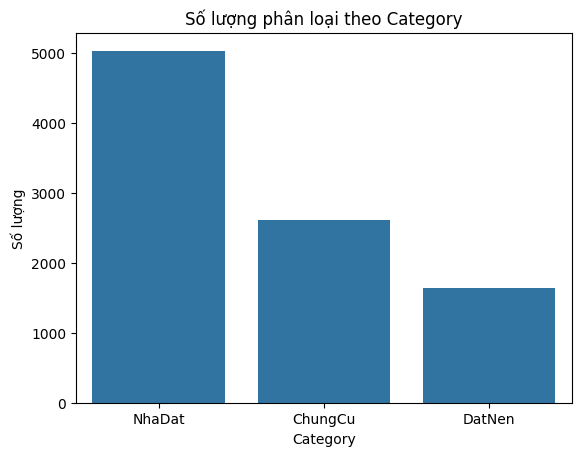

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân loại
sns.countplot(data=df_combined, x='category')

# Thêm tiêu đề và nhãn
plt.title('Số lượng phân loại theo Category')
plt.xlabel('Category')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()


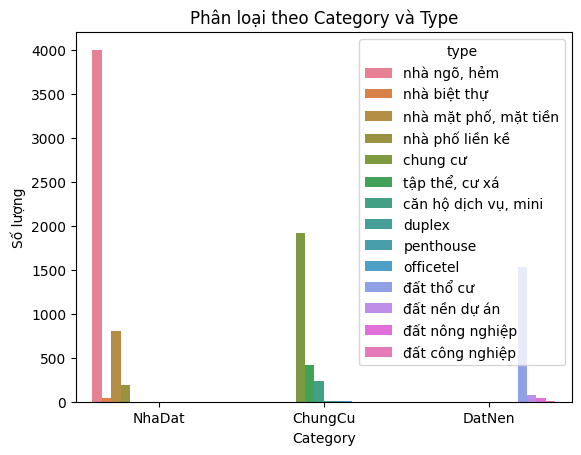

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phần phố
sns.countplot(data=df_combined, x='category', hue='type')

# Thêm tiêu đề và nhãn
plt.title('Phân loại theo Category và Type')
plt.xlabel('Category')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()


<ipython-input-11-5ac66a2dcb3c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_combined['price_VND'], shade=True)


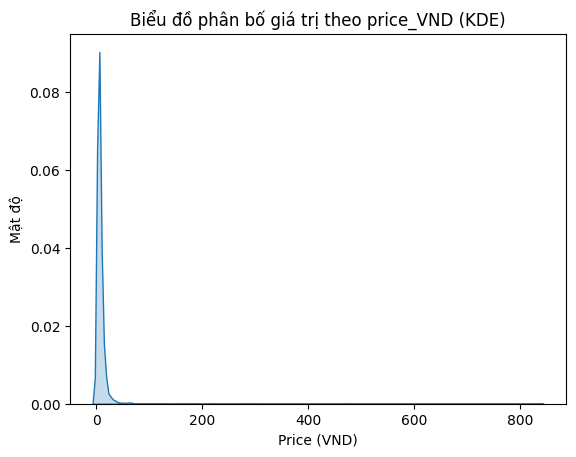

In [11]:
# Vẽ biểu đồ KDE phân bố giá trị của price_VND
sns.kdeplot(df_combined['price_VND'], shade=True)

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ phân bố giá trị theo price_VND (KDE)')
plt.xlabel('Price (VND)')
plt.ylabel('Mật độ')

# Hiển thị biểu đồ
plt.show()


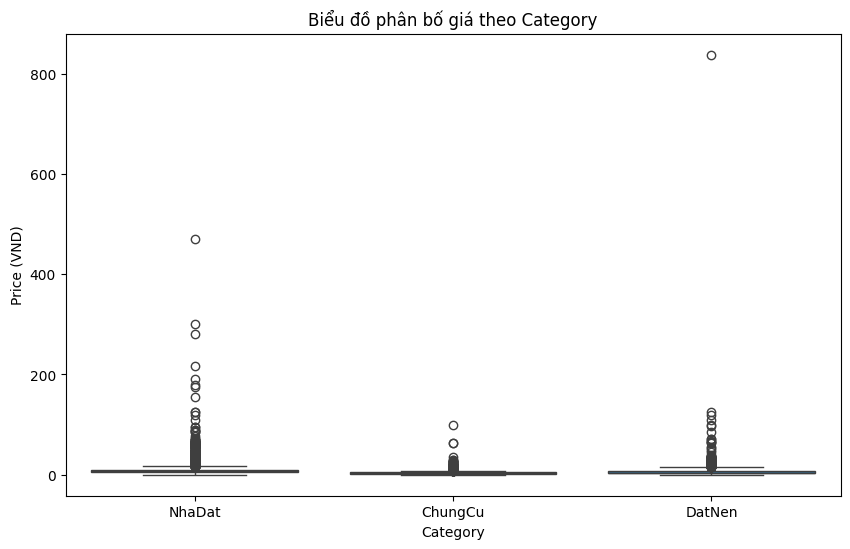

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân bố giá theo category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price_VND', data=df_combined)

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ phân bố giá theo Category')
plt.xlabel('Category')
plt.ylabel('Price (VND)')

# Hiển thị biểu đồ
plt.show()


<ipython-input-13-7a84c8b1d145>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_combined['area'], shade=True)


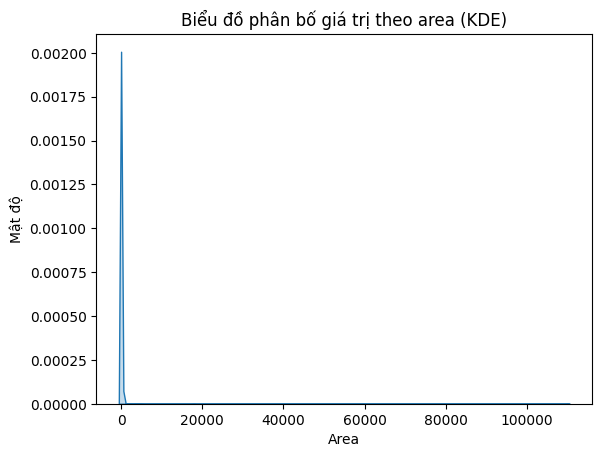

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ KDE phân bố giá trị của area
sns.kdeplot(df_combined['area'], shade=True)

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ phân bố giá trị theo area (KDE)')
plt.xlabel('Area')
plt.ylabel('Mật độ')

# Hiển thị biểu đồ
plt.show()


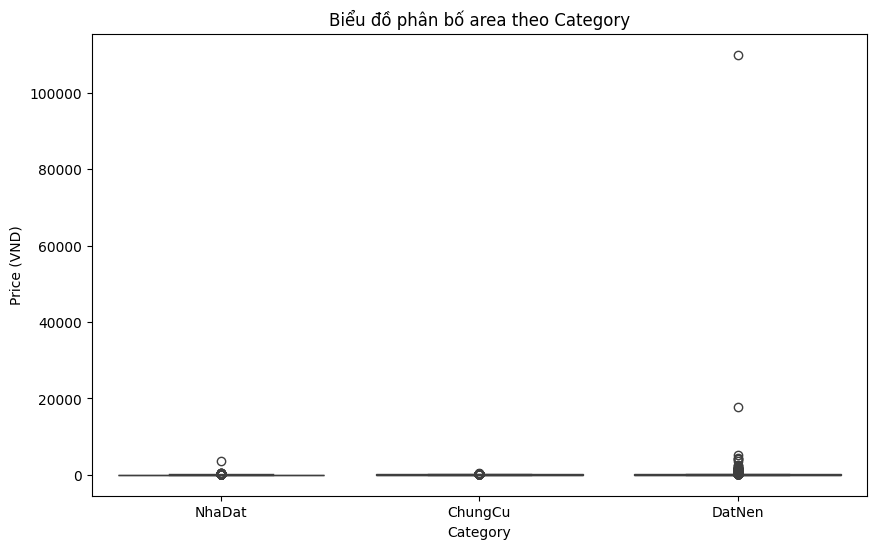

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân bố giá theo category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='area', data=df_combined)

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ phân bố area theo Category')
plt.xlabel('Category')
plt.ylabel('Price (VND)')

# Hiển thị biểu đồ
plt.show()

# **Chuẩn bị dữ liệu**

<ipython-input-15-6c5eec3d8c6d>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['toilet'].fillna(0, inplace=True)
<ipython-input-15-6c5eec3d8c6d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

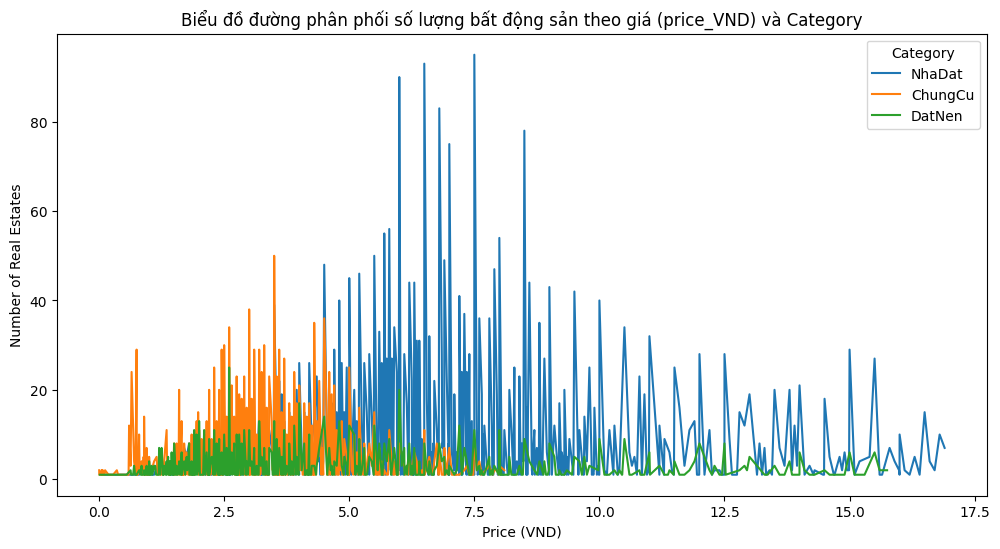

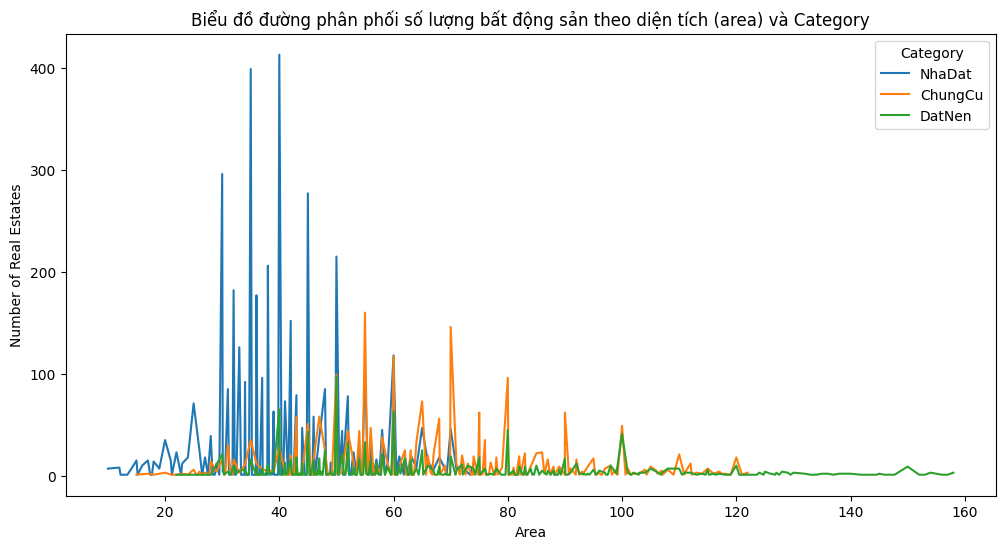

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def prepare_data(df):
    """
    Chuẩn bị dữ liệu theo yêu cầu.

    Args:
        df (pd.DataFrame): Dữ liệu đầu vào.

    Returns:
        pd.DataFrame: Dữ liệu đã được xử lý.
    """
    # Xử lý các giá trị null trong các cột 'toilet' và 'room'
    df['toilet'].fillna(0, inplace=True)
    df['room'].fillna(0, inplace=True)

    # Xử lý các giá trị null trong cột 'floor' theo điều kiện category
    df['Số tầng'] = df.apply(
        lambda row: 0 if pd.isnull(row['Số tầng']) and row['category'] in ['NhaDat', 'ChungCu'] else
        (0 if pd.isnull(row['Số tầng']) and row['category'] == 'DatNen' else row['Số tầng']),
        axis=1
    )

    # Xử lý các giá trị null trong cột 'furnishing'
    df['furnishing'].fillna('Không rõ', inplace=True)

    # Tiền xử lý: Bỏ qua các dòng có giá trị null trong cột 'location'
    df = df.dropna(subset=['location'])

    # Sử dụng biểu thức chính quy để tách các phần Đường, Phường, Quận
    df['Đường'] = df['location'].str.extract(r'(Đường [^,]+)')
    df['Phường'] = df['location'].str.extract(r'(Phường [^,]+)')
    df['Quận'] = df['location'].str.extract(r'(Quận [^,]+)')

    # Xóa thuộc tính location
    df.drop('location', axis=1, inplace=True)

    return df


def remove_outliers_iqr(df, category_col, value_col):
    """
    Loại bỏ giá trị ngoại lai theo IQR trong mỗi category.

    Args:
        df (pd.DataFrame): Dữ liệu đầu vào.
        category_col (str): Tên cột phân loại.
        value_col (str): Tên cột giá trị cần loại bỏ ngoại lai.

    Returns:
        pd.DataFrame: Dữ liệu không có ngoại lai.
    """
    df_no_outliers = pd.DataFrame()

    for category in df[category_col].unique():
        category_data = df[df[category_col] == category]

        # Tính Q1, Q3 và IQR
        Q1 = category_data[value_col].quantile(0.25)
        Q3 = category_data[value_col].quantile(0.75)
        IQR = Q3 - Q1

        # Giới hạn dưới và trên
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Loại bỏ giá trị ngoại lai
        category_data_no_outliers = category_data[(category_data[value_col] >= lower_bound) &
                                                  (category_data[value_col] <= upper_bound)]

        df_no_outliers = pd.concat([df_no_outliers, category_data_no_outliers])

    return df_no_outliers


# Chuẩn bị dữ liệu
df_combined = prepare_data(df_combined)

# Loại bỏ các giá trị ngoại lai
df_prepared = remove_outliers_iqr(df_combined, 'category', 'price_VND')
df_prepared = remove_outliers_iqr(df_prepared, 'category', 'area')

# Vẽ biểu đồ phân phối price_VND theo category
plt.figure(figsize=(12, 6))

for category in df_prepared['category'].unique():
    category_data = df_prepared[df_prepared['category'] == category]
    price_counts = category_data.groupby('price_VND').size().reset_index(name='count')
    sns.lineplot(data=price_counts, x='price_VND', y='count', label=category)

plt.title('Biểu đồ đường phân phối số lượng bất động sản theo giá (price_VND) và Category')
plt.xlabel('Price (VND)')
plt.ylabel('Number of Real Estates')
plt.legend(title='Category')
plt.show()

# Vẽ biểu đồ phân phối area theo category
plt.figure(figsize=(12, 6))

for category in df_prepared['category'].unique():
    category_data = df_prepared[df_prepared['category'] == category]
    area_counts = category_data.groupby('area').size().reset_index(name='count')
    sns.lineplot(data=area_counts, x='area', y='count', label=category)

plt.title('Biểu đồ đường phân phối số lượng bất động sản theo diện tích (area) và Category')
plt.xlabel('Area')
plt.ylabel('Number of Real Estates')
plt.legend(title='Category')
plt.show()


In [16]:
df_prepared

,du_an,price_VND,status,area,price_m2,toilet,room,doc,type,Số tầng,furnishing,category,Đường,Phường,Quận
0,NaN,4.390,NaN,19.0,231.05,3.0,3.0,Đã có sổ,"nhà ngõ, hẻm",4.0,Hoàn thiện cơ bản,NhaDat,Đường Thái Hà,Phường Trung Liệt,Quận Đống Đa
1,NaN,5.800,NaN,30.0,193.33,4.0,3.0,Đã có sổ,"nhà ngõ, hẻm",0,Không rõ,NhaDat,NaN,Phường Khương Trung,Quận Thanh Xuân
2,NaN,6.900,NaN,40.0,172.5,4.0,4.0,Đã có sổ,"nhà ngõ, hẻm",5.0,Nội thất đầy đủ,NhaDat,NaN,Phường Phú La,Quận Hà Đông
3,NaN,5.900,NaN,38.0,155.26,0,4.0,Đã có sổ,"nhà ngõ, hẻm",0,Không rõ,NhaDat,Đường Lĩnh Nam,Phường Lĩnh Nam,Quận Hoàng Mai
4,NaN,7.280,NaN,35.0,208.0,4.0,3.0,Đã có sổ,"nhà ngõ, hẻm",5.0,Không rõ,NhaDat,NaN,Phường Hoàng Văn Thụ,Quận Hoàng Mai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,NaN,1.490,NaN,47.0,31.7,0,0,Đã có sổ,đất thổ cư,0,Không rõ,DatNen,NaN,NaN,NaN
9283,NaN,2.484,NaN,92.0,27.0,0,0,Đã có sổ,đất thổ cư,0,Không rõ,DatNen,NaN,NaN,NaN
9284,NaN,10.200,NaN,47.0,217.02,0,0,Đã có sổ,đất thổ cư,0,Không rõ,DatNen,NaN,Phường Long Biên,Quận Long Biên
9285,NaN,2.474,NaN,101.0,24.5,0,0,Đã có sổ,đất thổ cư,0,Không rõ,DatNen,NaN,NaN,NaN


In [17]:
df_prepared.to_csv('/content/BatDongSan.csv', index=False)